<a href="https://colab.research.google.com/github/PunithKumarR/Machine-Learning-Assignment_2/blob/main/Copy_of_KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
Gender = pd.get_dummies(df.Gender)
Gender.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [ ]:
df = pd.concat([df, Gender], axis = 1)
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1,0
396,15706071,Male,51,23000,1,0,1
397,15654296,Female,50,20000,1,1,0
398,15755018,Male,36,33000,0,0,1


In [ ]:
df.drop(['User ID','Gender'],axis='columns',inplace=True)

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [ ]:
X = df.drop('Purchased', axis = 'columns')
y = df['Purchased']

In [ ]:
X

,Age,EstimatedSalary,Female,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


**Splitting the dataset into the Training set and Test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

**Feature Scaling**

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**Fitting K-NN to the Training set**

In [ ]:
knn = KNeighborsClassifier(3)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

**Predicting the Test set results**

In [ ]:
predictions = knn.predict(X_test)
print('prediction:', predictions)
print(classification_report(y_test, predictions))

prediction: [0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        48
           1       0.78      0.91      0.84        32

    accuracy                           0.86        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80



**Making the Confusion Matrix**

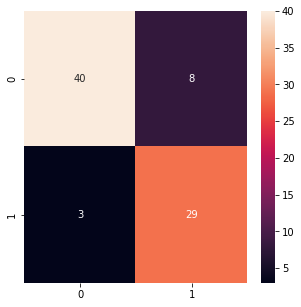

In [ ]:
plt.rcParams['figure.figsize'] = (5 , 5)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)

In [ ]:
print("Auroc: ",roc_auc_score(y_test, predictions))

Auroc:  0.8697916666666667
